**E-Commerce Shipping Data Predictive Modeling <br> Lucky Wijaya Pengestu**

# Import Library & Read Dataset

In [101]:
# Import Library
import warnings
warnings.filterwarnings('ignore')

# DataFrame Library
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling Library
import scipy.stats as st
import statsmodels.stats.proportion as sp
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, XGBRegressor

In [2]:
# Visualization plot settings
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.color_palette('viridis')
plt.style.use('seaborn-bright')

In [3]:
# Read dataset
df = pd.read_csv('Ecommerce_Shipping_Data.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Exploratory Data Analysis

In [4]:
# Checking DataFrame Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


| Variable | Type | Definition | Example |
| ----------- | ----------- | ----------- | ----------- |
| ID | Nominal | Customer ID Number | 10, 15, 10995, 10996
| Warehouse_block | Nominal | Warehouse to Store the Product | A, B, C, D, F
| Mode_of_Shipment | Nominal | Mode of Product Shipping | Flight, Road, Ship
| Customer_care_calls | Discrete | Number of Calls Made | 1, 2, 5, 6
| Customer_rating | Ordinal | Company Rating by Customers | 5: Best - 4: Better - 3: Neutral - 2: Bad - 1: Worst
| Cost_of_the_Product | Discrete | Cost of Product in US Dollars | 177, 216, 236, 182
| Prior_purchases | Discrete | Number of Prior Purchase | 3, 2, 6
| Product_importance | Ordinal | Product Importance Parameter | Low, Medium, High
| Gender | Nominal | Customer Gender | Male, Female
| Discount_offered | Discrete | Product Discount in US Dollars | 65, 10, 16
| Weight_in_gms | Continous | Product Weight in grams | 4953, 5676, 2171
| Reached.on.Time_Y.N | Nominal | Target Variable, 1: NOT reached on time - 0: REACHED on time | 1, 0

In [5]:
# Sampling
df.sample(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10323,10324,B,Ship,5,5,177,4,medium,F,2,4873,0
10029,10030,B,Ship,3,4,239,4,medium,F,10,5455,1
2161,2162,F,Ship,4,2,270,2,low,M,65,3599,1
10010,10011,A,Flight,5,5,105,4,low,M,6,5135,1
6422,6423,A,Road,3,5,258,4,low,F,3,4212,1
5099,5100,F,Ship,3,5,275,3,low,M,6,5148,0
10963,10964,F,Flight,4,5,220,10,medium,M,8,4100,1
7390,7391,C,Road,3,5,223,7,high,M,8,4178,1
1241,1242,F,Flight,4,5,227,4,low,F,20,2217,1
5395,5396,F,Ship,4,3,248,3,low,M,5,4781,1


In [6]:
# Changing Column Name
df.rename(columns={'ID' : 'ID', 'Warehouse_block' : 'Warehouse', 'Mode_of_Shipment' : 'Shipment', 
                   'Customer_care_calls' : 'Calls', 'Customer_rating' : 'Rating', 'Cost_of_the_Product' : 'Cost', 
                   'Prior_purchases' : 'Purchase', 'Product_importance' : 'Importance', 'Gender' : 'Gender', 
                   'Discount_offered' : 'Discount', 'Weight_in_gms' : 'Weight', 'Reached.on.Time_Y.N' : 'Late'}, inplace = True)

In [7]:
# Check DataFrame
df.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Pendekatan Numerik

In [8]:
# Changing data type for describe data
df = df.astype({'ID' : object, 'Rating' : object, 'Late' : object})

# Separating column based on data type
cats = ['ID', 'Warehouse', 'Shipment', 'Rating', 'Importance', 'Gender', 'Late']
nums = ['Calls', 'Cost', 'Purchase', 'Discount', 'Weight', ]

In [9]:
# Describe categorical value
df[cats].describe()

,ID,Warehouse,Shipment,Rating,Importance,Gender,Late
count,10999,10999,10999,10999,10999,10999,10999
unique,10999,5,3,5,3,2,2
top,10999,F,Ship,3,low,F,1
freq,1,3666,7462,2239,5297,5545,6563


In [10]:
# Describe numerical value
df[nums].describe()

,Calls,Cost,Purchase,Discount,Weight
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,210.196836,3.567597,13.373216,3634.016729
std,1.141490,48.063272,1.522860,16.205527,1635.377251
min,2.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,310.000000,10.000000,65.000000,7846.000000


In [11]:
# Count target value
df['Late'].value_counts()

1    6563
0    4436
Name: Late, dtype: int64

In [12]:
# Changing data type for visualization
df = df.astype({'ID' : 'int64', 'Rating' : 'int64', 'Late' : 'int64'})

# Separating columns based on data type for visualization
cats = ['Warehouse', 'Shipment', 'Importance', 'Gender']
nums = ['Calls', 'Rating', 'Cost', 'Purchase', 'Discount', 'Weight', 'Late']

In [13]:
# Cheking DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10999 non-null  int64 
 1   Warehouse   10999 non-null  object
 2   Shipment    10999 non-null  object
 3   Calls       10999 non-null  int64 
 4   Rating      10999 non-null  int64 
 5   Cost        10999 non-null  int64 
 6   Purchase    10999 non-null  int64 
 7   Importance  10999 non-null  object
 8   Gender      10999 non-null  object
 9   Discount    10999 non-null  int64 
 10  Weight      10999 non-null  int64 
 11  Late        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


## Pendekatan Grafis

### Univariate Analysis

#### Boxplot

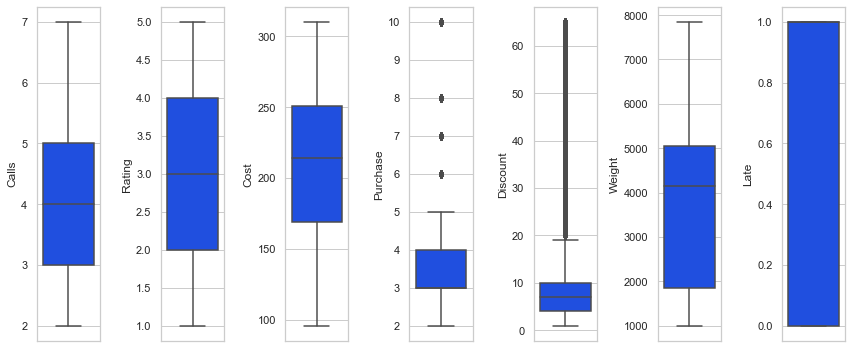

In [146]:
# Boxplot Visualization
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

There are outliers in `Purchase` & `Discount` feature

#### Distplot

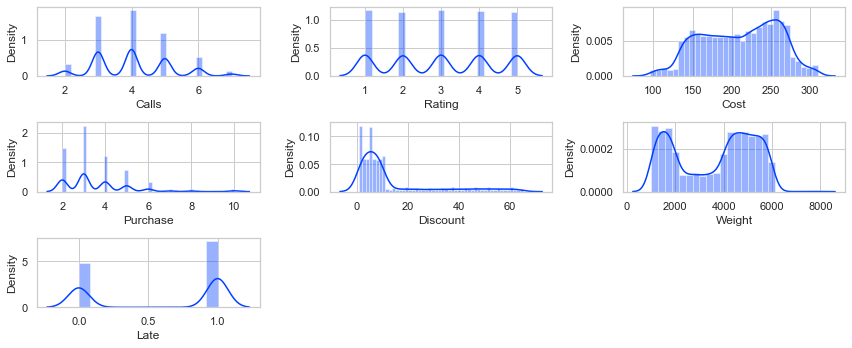

In [15]:
# Distplot Visualization
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

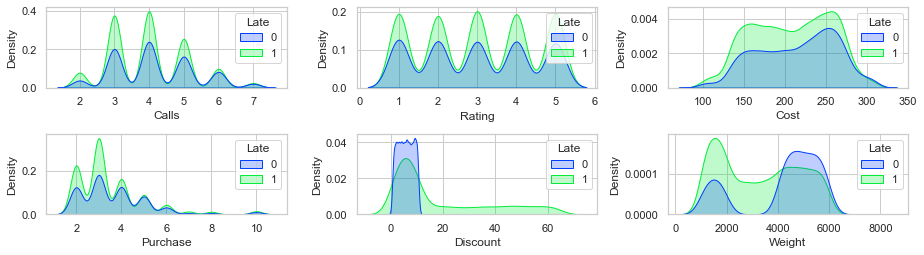

In [16]:
# KDEplot with Target Hue
numsplot = ['Calls','Rating', 'Cost','Purchase', 'Discount', 'Weight']
plt.figure(figsize=(13, 5))
for i in range(0, len(numsplot)):
    plt.subplot(3, len(numsplot)/2, i+1)
    sns.kdeplot(data=df, x=df[numsplot[i]], hue='Late', fill='True')
    plt.tight_layout()

There are anomaly on `Weight` & `Discount` feature

#### Violinplot

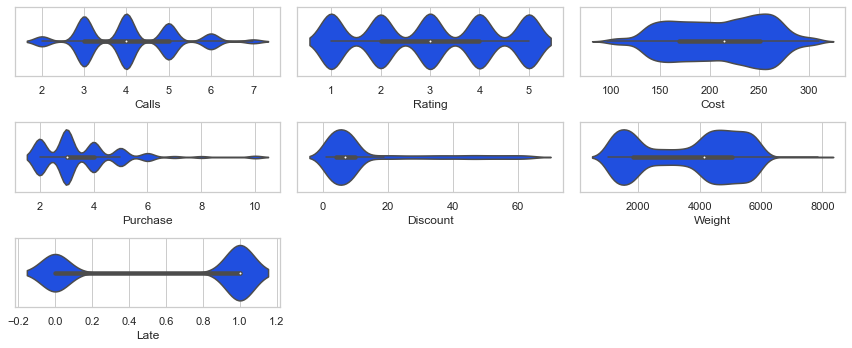

In [17]:
# Violinplot Visualization
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.violinplot(df[nums[i]])
    plt.tight_layout()

#### Countplot

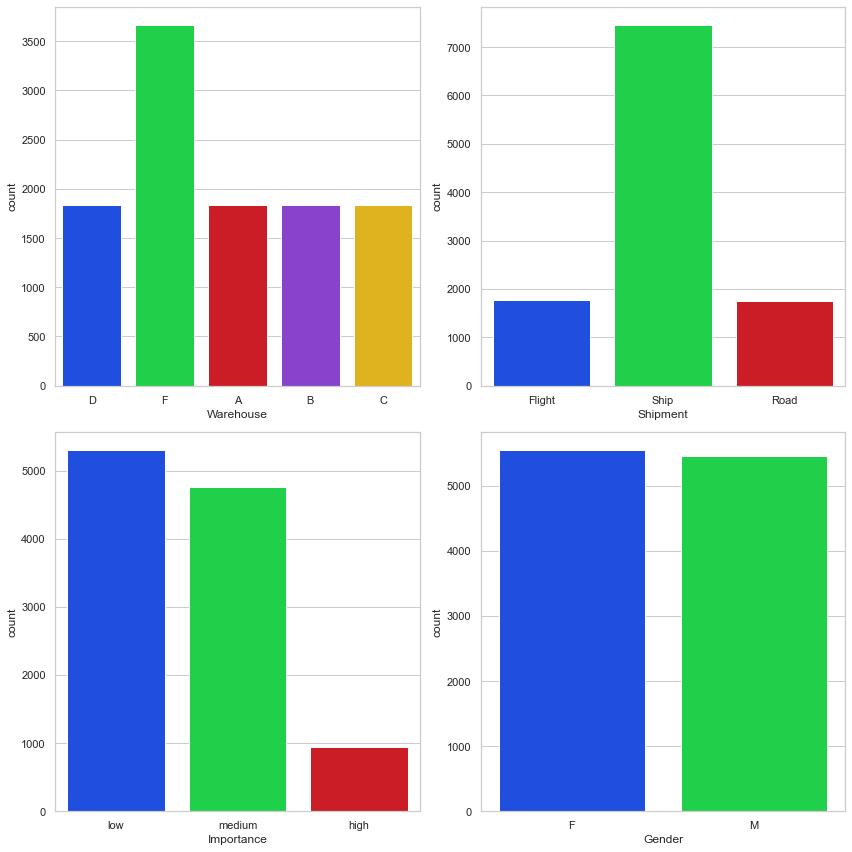

In [18]:
# Countplot Visualization
plt.figure(figsize=(12, 12))
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(df[cats[i]], orient='v')
    plt.tight_layout()

`Warehouse` F & `Shipment` Ship has the highest shipping frequency

<AxesSubplot:xlabel='Late', ylabel='count'>

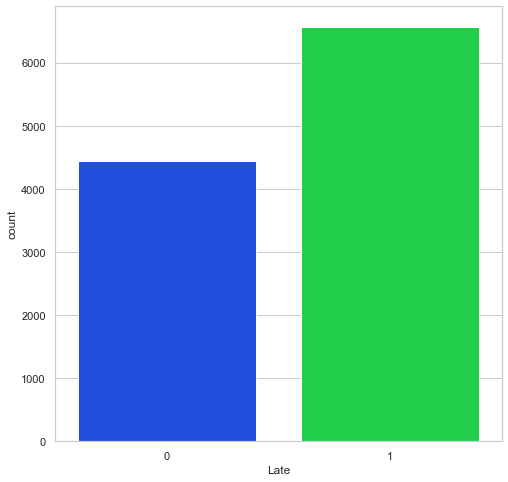

In [19]:
# Countplot Target Visualization
plt.figure(figsize=(8, 8))
sns.countplot(x=df['Late'], data=df)

**59.7%** of E-Commerce Shipping is Late (**6563 from 10999 customers**)

### Multivariate Analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10999 non-null  int64 
 1   Warehouse   10999 non-null  object
 2   Shipment    10999 non-null  object
 3   Calls       10999 non-null  int64 
 4   Rating      10999 non-null  int64 
 5   Cost        10999 non-null  int64 
 6   Purchase    10999 non-null  int64 
 7   Importance  10999 non-null  object
 8   Gender      10999 non-null  object
 9   Discount    10999 non-null  int64 
 10  Weight      10999 non-null  int64 
 11  Late        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


#### Histplot

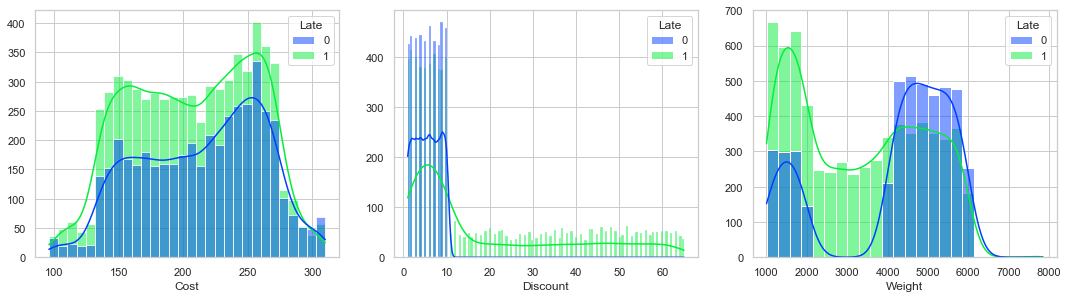

In [21]:
# Histplot Visualization with Target Hue
flag2 = ['Cost', 'Discount', 'Weight']

plt.figure(figsize=(15, 12))
for i in range(0, len(flag2)):
    plt.subplot(len(flag2), 3, i+1)
    sns.histplot(data=df, x=df[flag2[i]], hue=df['Late'], fill=True, kde='True')
    plt.tight_layout()
    plt.ylabel(None)

**Discount** <br>
Every product that gets a discount above 10 is confirmed Late. There is an assumption that this happens in specific months, but needs further checking.

**Weight** <br>
Shipping delivery is confirmed late when the product weight is between 2-4 kg.

#### Boxplot

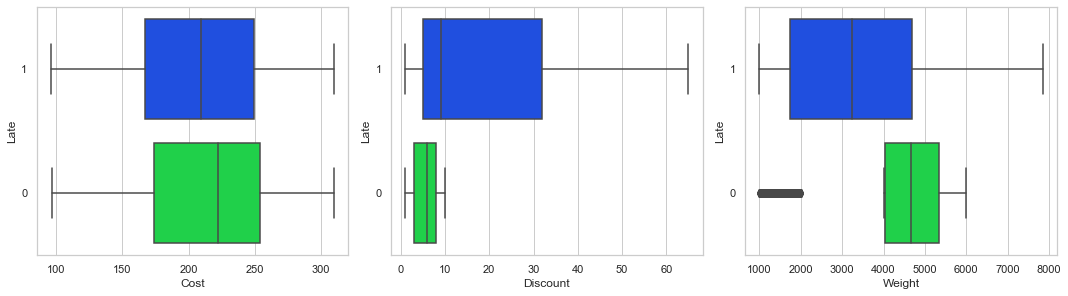

In [22]:
# Boxplot Visualization with Target Hue
plt.figure(figsize=(15, 12))
for i in range(0, len(flag2)):
    plt.subplot(len(flag2), 3, i+1)
    sns.boxplot(data=df, x=df[flag2[i]], y=df['Late'].astype(str))
    plt.tight_layout()

#### Barplot

In [23]:
# Shipment Late Percentage
df_ship = df.groupby(['Shipment', 'Late']).agg({'ID' : 'count' }).reset_index()
df_ship.columns = ['Shipment', 'Late', 'Count']
df_ship['Total'] = df_ship.groupby(['Shipment'])['Count'].transform('sum')
df_ship['Percentage'] = round(df_ship['Count'] / df_ship['Total'] * 100, 2)
df_ship

,Shipment,Late,Count,Total,Percentage
0,Flight,0,708,1777,39.84
1,Flight,1,1069,1777,60.16
2,Road,0,725,1760,41.19
3,Road,1,1035,1760,58.81
4,Ship,0,3003,7462,40.24
5,Ship,1,4459,7462,59.76


<AxesSubplot:xlabel='Shipment', ylabel='Percentage'>

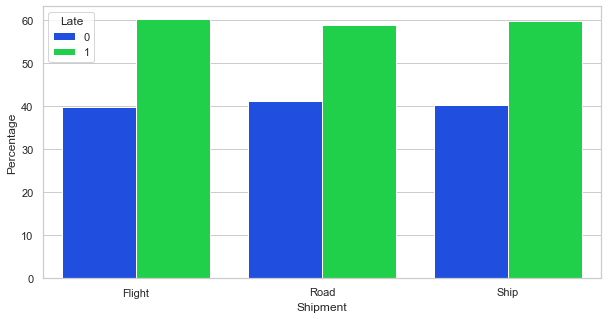

In [24]:
# Shipment Late Percentage Visualization
sns.barplot(x = 'Shipment', y = 'Percentage' , data = df_ship, hue = 'Late')

<AxesSubplot:xlabel='Shipment', ylabel='count'>

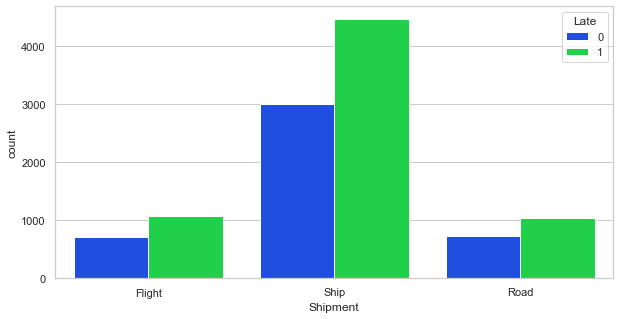

In [25]:
# Shipment Late Frequency Visualization
sns.countplot(x = 'Shipment', data = df, hue = 'Late')

Ship has the highest frequency of delivery. But it looks almost the same based on the percentage. There's an assumtion that the late is influenced by other factors. 

In [26]:
# Warehouse Late Percentage
df_warehouse = df.groupby(['Warehouse', 'Late']).agg({'ID' : 'count' }).reset_index()
df_warehouse.columns = ['Warehouse', 'Late', 'Count']
df_warehouse['Total'] = df_warehouse.groupby(['Warehouse'])['Count'].transform('sum')
df_warehouse['Percentage'] = round(df_warehouse['Count'] / df_warehouse['Total'] * 100, 2)
df_warehouse

,Warehouse,Late,Count,Total,Percentage
0,A,0,758,1833,41.35
1,A,1,1075,1833,58.65
2,B,0,729,1833,39.77
3,B,1,1104,1833,60.23
4,C,0,739,1833,40.32
5,C,1,1094,1833,59.68
6,D,0,738,1834,40.24
7,D,1,1096,1834,59.76
8,F,0,1472,3666,40.15
9,F,1,2194,3666,59.85


<AxesSubplot:xlabel='Warehouse', ylabel='Percentage'>

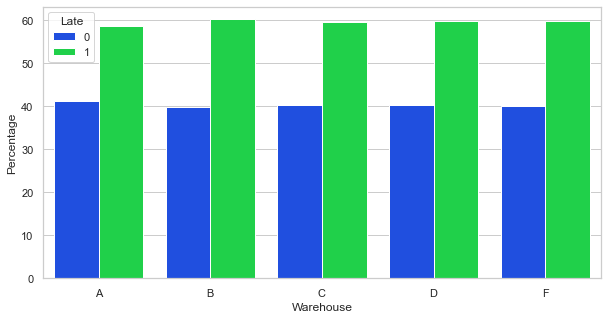

In [27]:
# Warehouse Late Percentage Visualization
sns.barplot(x = 'Warehouse', y = 'Percentage' , data = df_warehouse, hue = 'Late')

<AxesSubplot:xlabel='Warehouse', ylabel='count'>

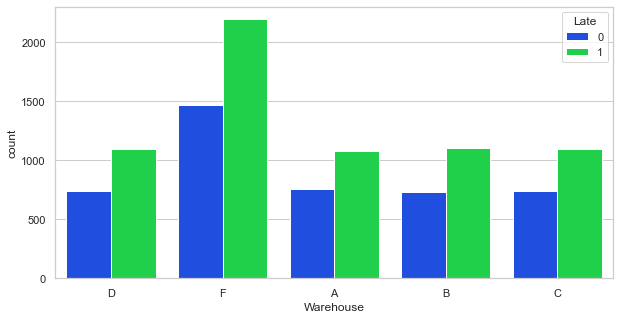

In [28]:
# Warehouse Late Frequency Visualization
sns.countplot(x = 'Warehouse', data = df, hue = 'Late')

Warehouse F has the highest frequency of delivery. But it looks almost the same based on the percentage. There's an assumtion that the late is influenced by other factors such as human resources factor.

In [29]:
# Calls Late Percentage
df_calls = df.groupby(['Calls', 'Late']).agg({'ID' : 'count' }).reset_index()
df_calls.columns = ['Calls', 'Late', 'Count']
df_calls['Total'] = df_calls.groupby(['Calls'])['Count'].transform('sum')
df_calls['Percentage'] = round(df_calls['Count'] / df_calls['Total'] * 100, 2)
df_calls

,Calls,Late,Count,Total,Percentage
0,2,0,222,638,34.80
1,2,1,416,638,65.20
2,3,0,1206,3217,37.49
3,3,1,2011,3217,62.51
4,4,0,1431,3557,40.23
5,4,1,2126,3557,59.77
6,5,0,968,2328,41.58
7,5,1,1360,2328,58.42
8,6,0,490,1013,48.37
9,6,1,523,1013,51.63


<AxesSubplot:xlabel='Calls', ylabel='Percentage'>

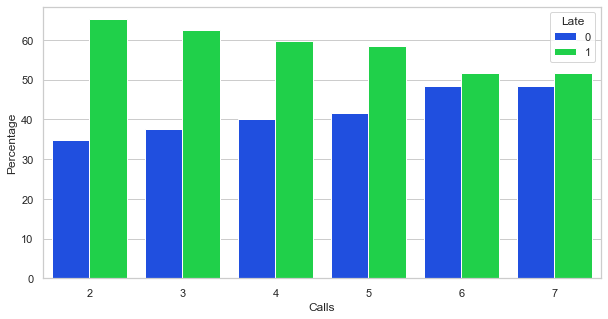

In [30]:
# Calls Late Percentage Visualization
sns.barplot(x = 'Calls', y = 'Percentage' , data = df_calls, hue = 'Late')

<AxesSubplot:xlabel='Calls', ylabel='count'>

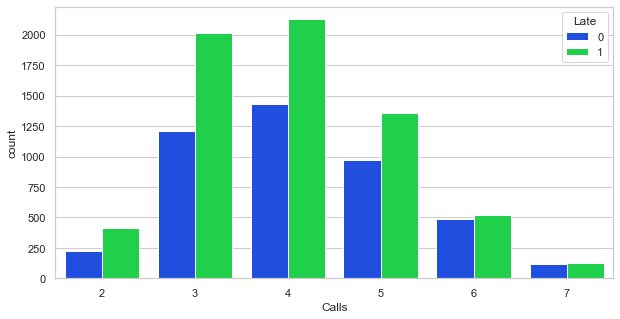

In [31]:
# Calls Late Frequency Visualization
sns.countplot(x = 'Calls', data = df, hue = 'Late')

More Calls number reduce probability of late shipping delivery.

In [32]:
# Product Importance Late Percentage
df_importance = df.groupby(['Importance', 'Late']).agg({'ID' : 'count' }).reset_index()
df_importance.columns = ['Importance', 'Late', 'Count']
df_importance['Total'] = df_importance.groupby(['Importance'])['Count'].transform('sum')
df_importance['Percentage'] = round(df_importance['Count'] / df_importance['Total'] * 100, 2)
df_importance

,Importance,Late,Count,Total,Percentage
0,high,0,332,948,35.02
1,high,1,616,948,64.98
2,low,0,2157,5297,40.72
3,low,1,3140,5297,59.28
4,medium,0,1947,4754,40.95
5,medium,1,2807,4754,59.05


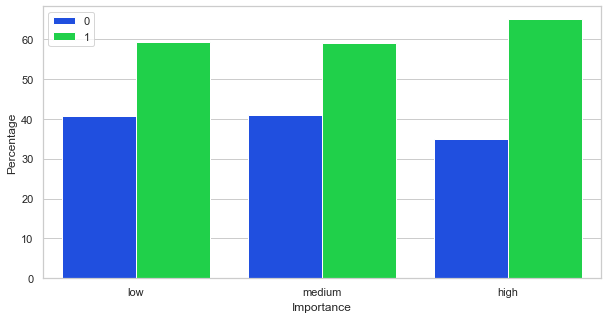

In [33]:
# Product Importance Late Percentage Visualization
sns.barplot(x = 'Importance', y = 'Percentage' , data = df_importance, hue = 'Late', 
           order = ['low', 'medium', 'high'])
plt.legend(loc= 'upper left')

<AxesSubplot:xlabel='Importance', ylabel='count'>

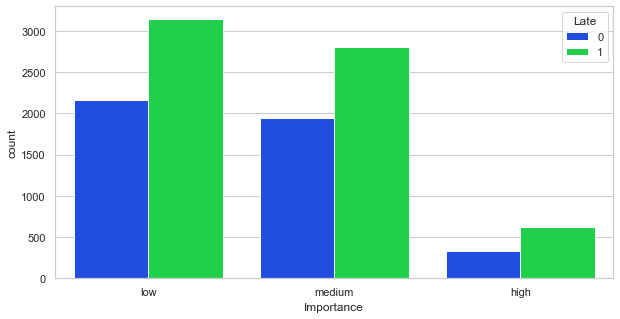

In [34]:
# Product Importance Late Frequency Visualization
sns.countplot(x = 'Importance', data = df, hue = 'Late')

<AxesSubplot:xlabel='Discount', ylabel='count'>

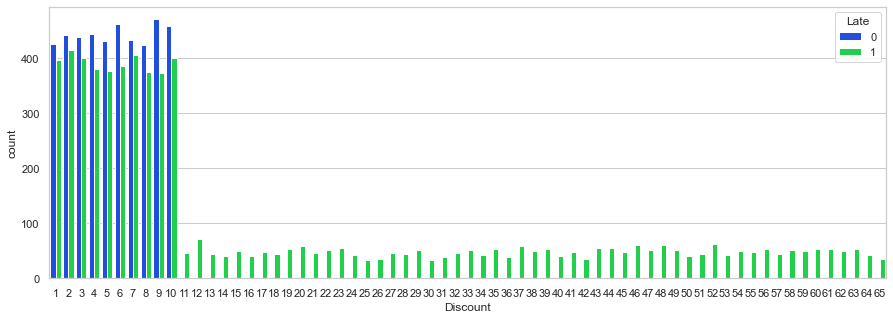

In [35]:
# Discount Late Frequency
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Discount', data = df, hue = 'Late')

In [36]:
# Discount Late Frequency 
df_discount = df[['Discount','Late']]
Discount_Group = []

for index, kolom in df_discount.iterrows():
    if kolom['Discount']>=0 and kolom['Discount']<=10:
        Discount_Group.append('1 - 10')
    elif kolom['Discount']>=11 and kolom['Discount']<=20:
        Discount_Group.append('11 - 20')
    elif kolom['Discount']>=21 and kolom['Discount']<=30:
        Discount_Group.append('21 - 30')    
    else:
        Discount_Group.append('> 30')

        
df_discount['Discount_Group'] = Discount_Group
df_discount = df_discount.groupby(['Discount_Group','Late'])['Discount'].count().reset_index()
df_discount.columns = ['Discount_Group', 'Late', 'SubTotal']
df_discount

,Discount_Group,Late,SubTotal
0,1 - 10,0,4436
1,1 - 10,1,3916
2,11 - 20,1,496
3,21 - 30,1,441
4,> 30,1,1710


<AxesSubplot:xlabel='Discount_Group', ylabel='SubTotal'>

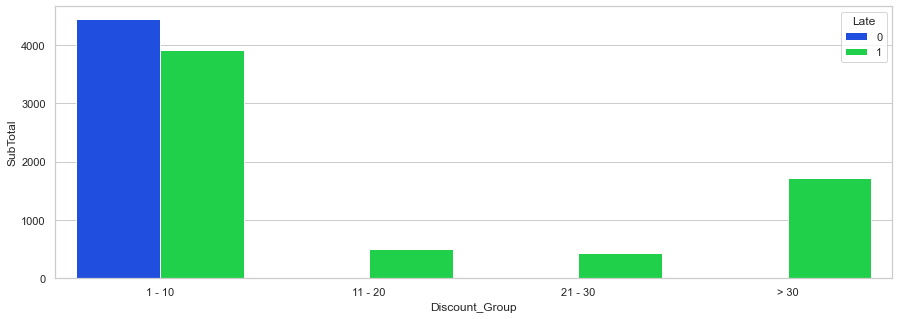

In [37]:
# Discount Late Frequency
plt.figure(figsize=(15, 5))
sns.barplot(x = 'Discount_Group', y = 'SubTotal', data = df_discount, hue = 'Late')

**Discount** <br>
Every product that gets a discount above 10 is confirmed Late. There is an assumption that this happens in specific months, but needs further checking.

In [38]:
# Purchase Late Percentage 
df_purchase = df.groupby(['Purchase', 'Late']).agg({'ID' : 'count' }).reset_index()
df_purchase.columns = ['Purchase', 'Late', 'Count']
df_purchase['Total'] = df_purchase.groupby(['Purchase'])['Count'].transform('sum')
df_purchase['Percentage'] = round(df_purchase['Count'] / df_purchase['Total'] * 100, 2)
df_purchase

,Purchase,Late,Count,Total,Percentage
0,2,0,974,2599,37.48
1,2,1,1625,2599,62.52
2,3,0,1421,3955,35.93
3,3,1,2534,3955,64.07
4,4,0,984,2155,45.66
5,4,1,1171,2155,54.34
6,5,0,645,1287,50.12
7,5,1,642,1287,49.88
8,6,0,247,561,44.03
9,6,1,314,561,55.97


<AxesSubplot:xlabel='Purchase', ylabel='Percentage'>

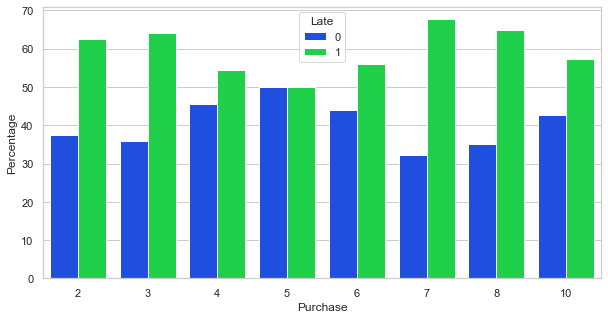

In [39]:
# Purchase Late Percentage Visualization
sns.barplot(x = 'Purchase', y = 'Percentage' , data = df_purchase, hue = 'Late')

<AxesSubplot:xlabel='Purchase', ylabel='count'>

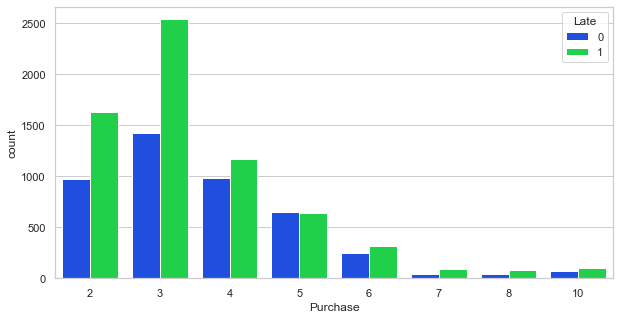

In [40]:
# Purchase Late Frequency Visualization
sns.countplot(x = 'Purchase', data = df, hue = 'Late')

#### Heatmap

<AxesSubplot:>

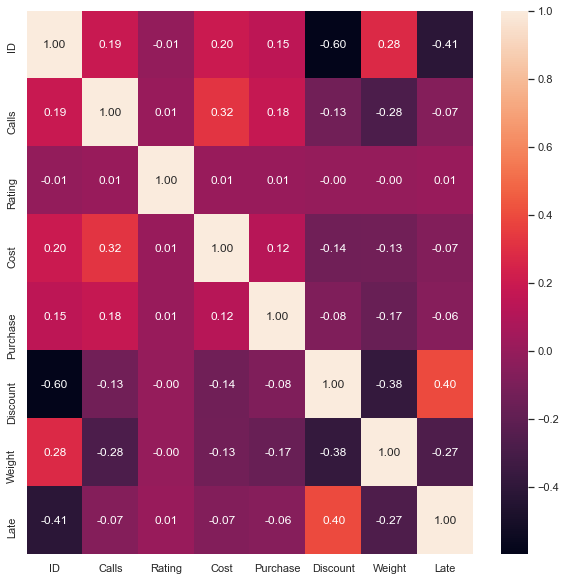

In [41]:
# Heatmap Visualization
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

There are no redundant features as no features are have strong value above 0.7.

#### Pairplot

<Figure size 720x720 with 0 Axes>

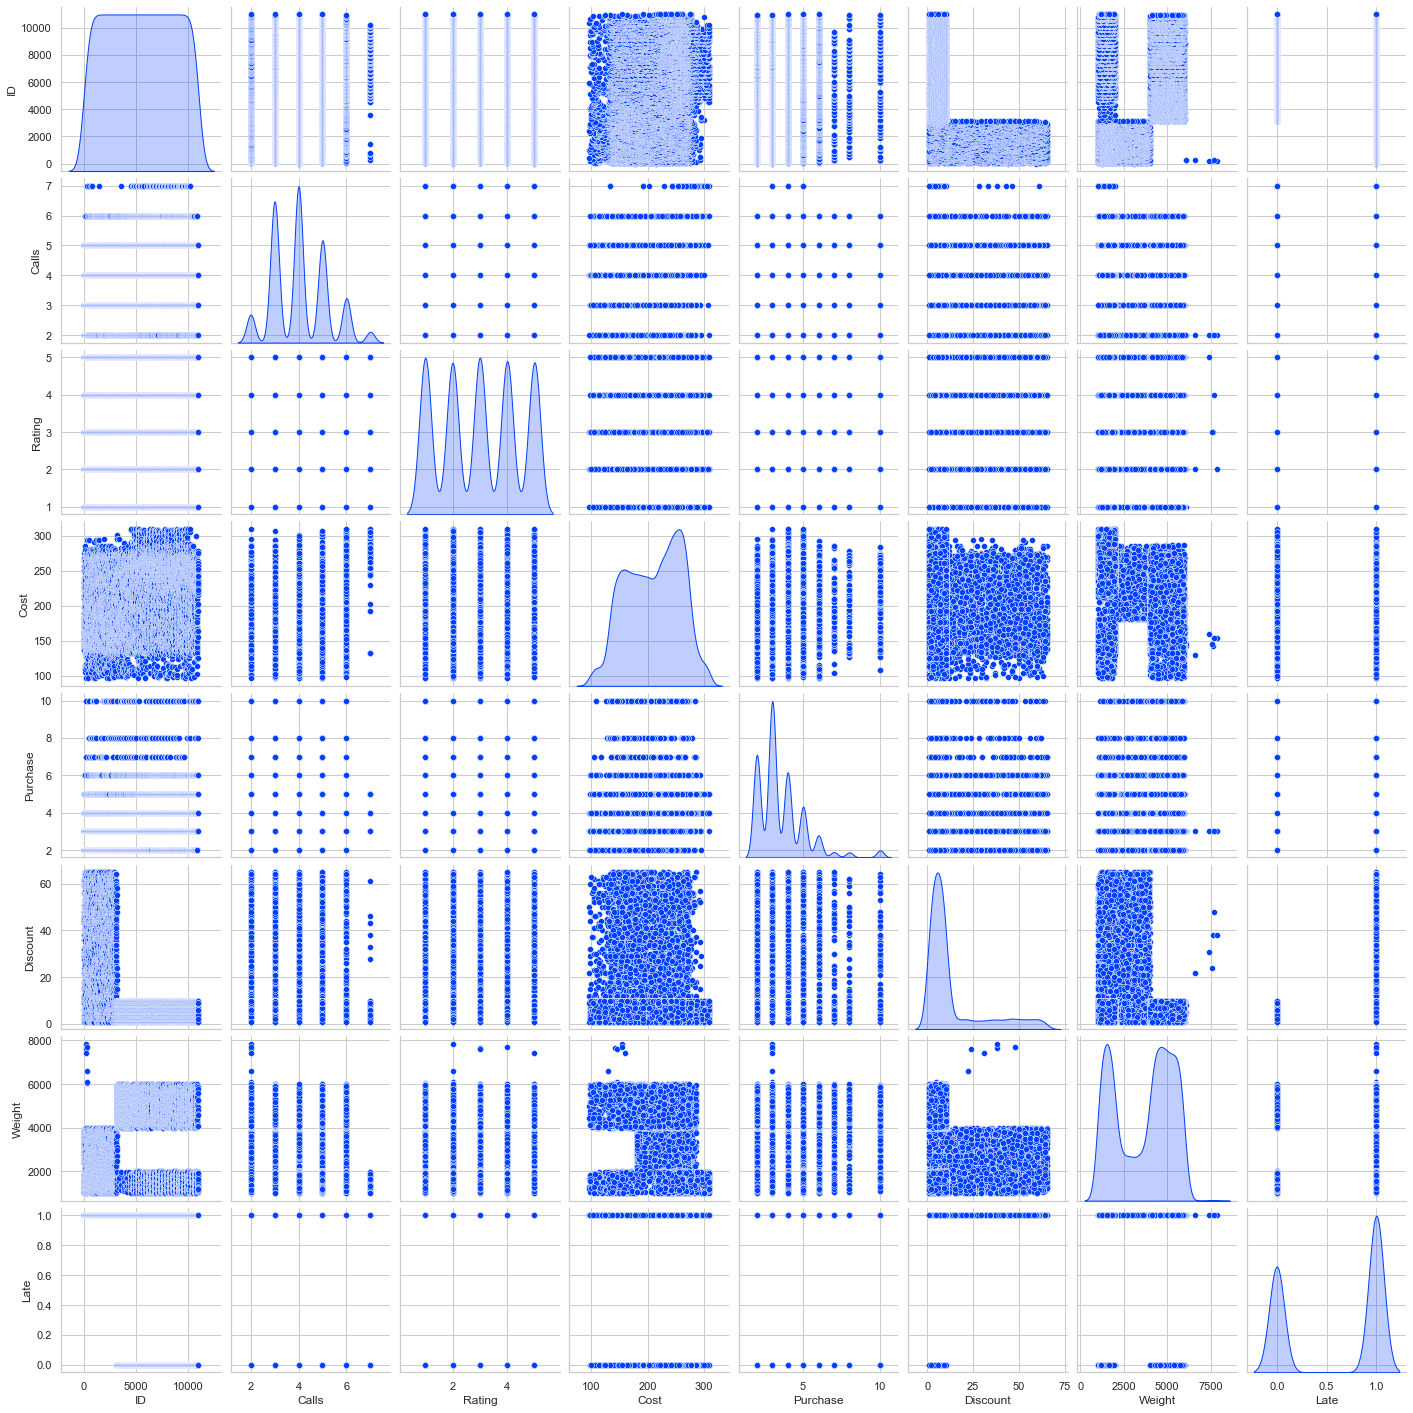

In [42]:
# Pairplot Visualization
plt.figure(figsize=(10, 10))
sns.pairplot(df, diag_kind='kde')

<Figure size 720x720 with 0 Axes>

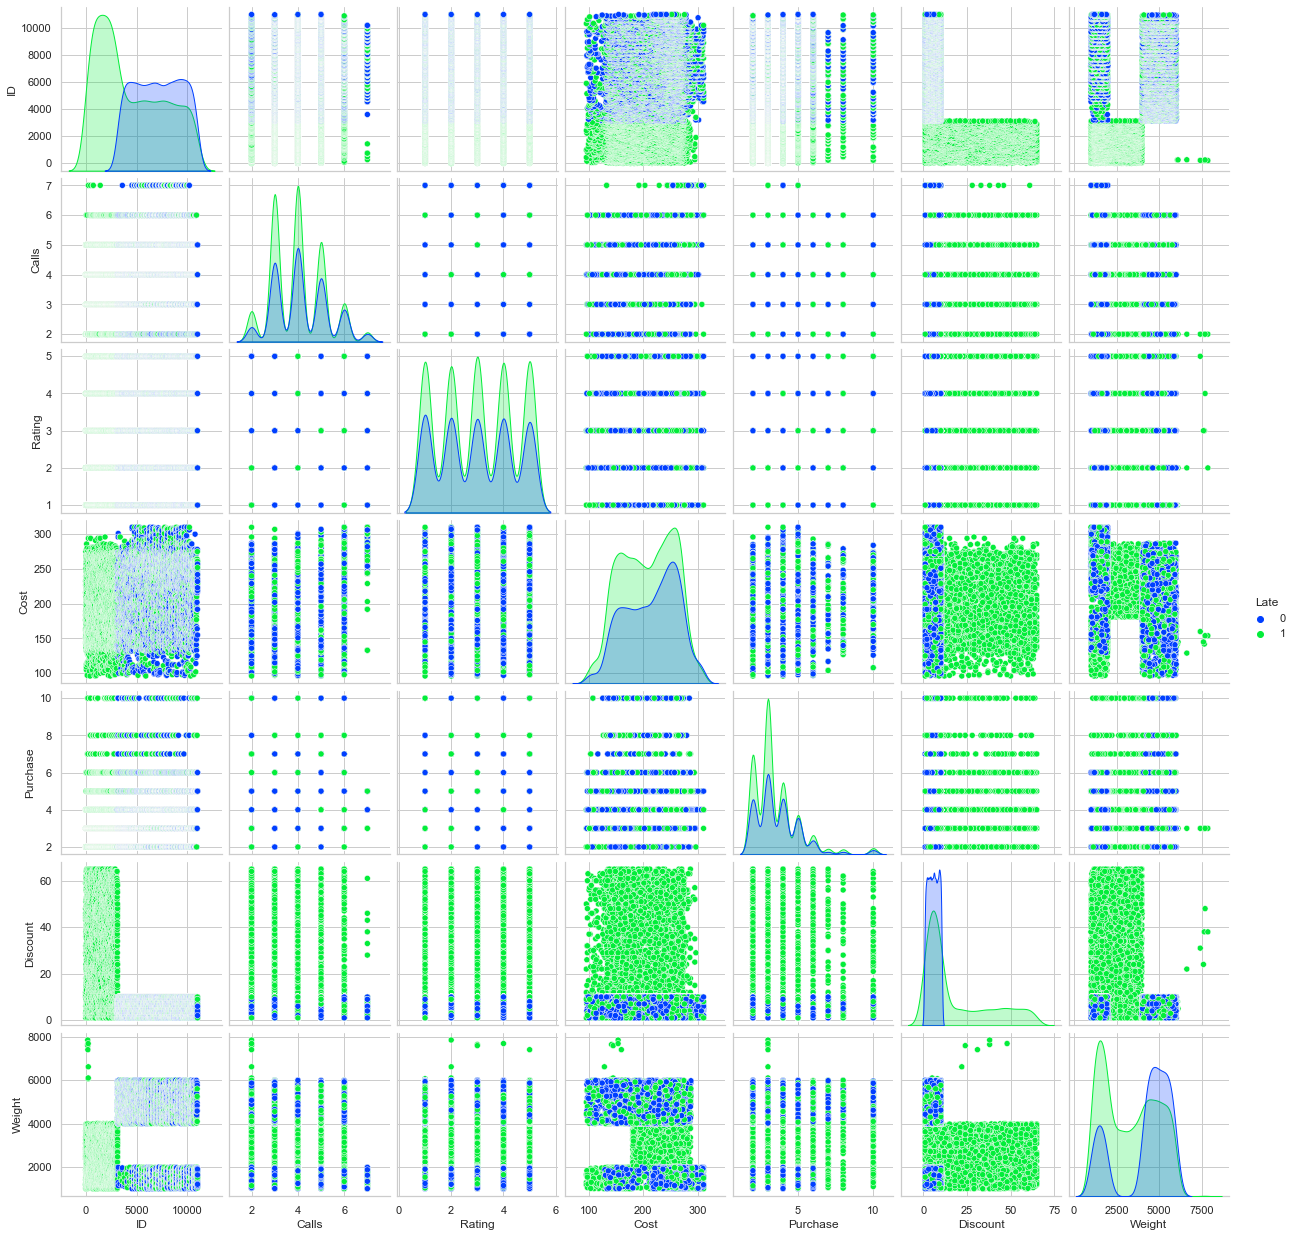

In [43]:
# Pairplot Visualization with Target Hue
plt.figure(figsize=(10, 10))
sns.pairplot(df, diag_kind='kde', hue='Late')

#### Catplot

<Figure size 864x576 with 0 Axes>

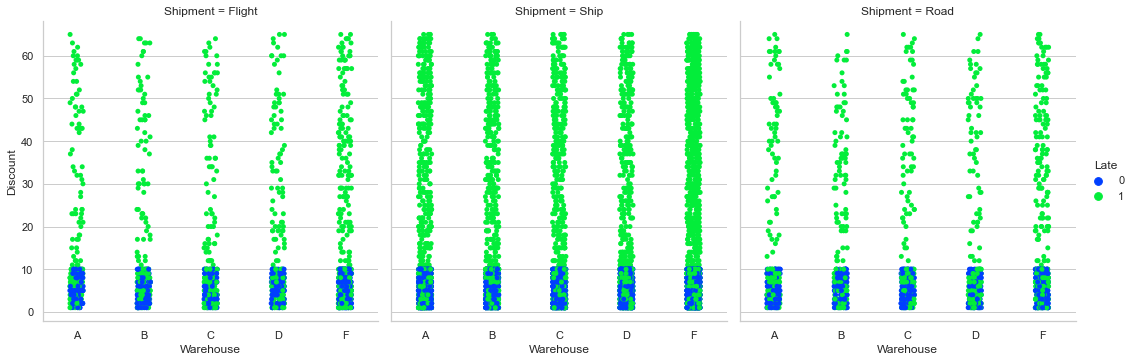

In [44]:
# Discount, Warehouse & Shipment Categorical Plot Visualization with Target Hue
plt.figure(figsize=(12, 8))
sns.catplot(x='Warehouse', y='Discount', hue='Late', col='Shipment', data=df, order=['A', 'B', 'C', 'D', 'F'])

<Figure size 864x576 with 0 Axes>

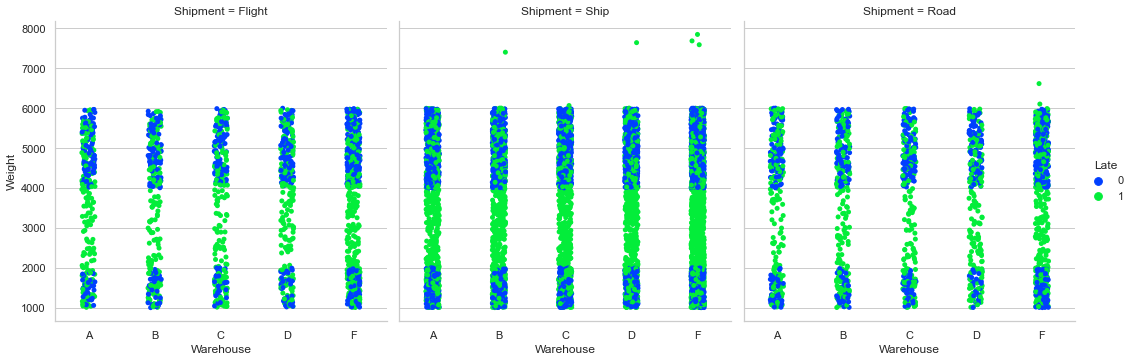

In [45]:
# Weight, Warehouse & Shipment Categorical Plot Visualization with Target Hue
plt.figure(figsize=(12, 8))
sns.catplot(x='Warehouse', y='Weight', hue='Late', col='Shipment', data=df, order=['A', 'B', 'C', 'D', 'F'])

<Figure size 864x576 with 0 Axes>

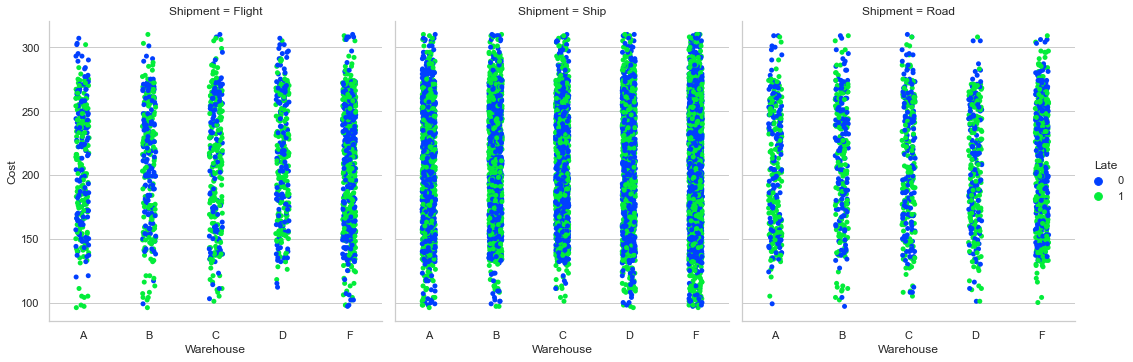

In [46]:
# Cost, Warehouse & Shipment Categorical Plot Visualization with Target Hue
plt.figure(figsize=(12, 8))
sns.catplot(x='Warehouse', y='Cost', hue='Late', col='Shipment', data=df, order=['A', 'B', 'C', 'D', 'F'])

<Figure size 864x576 with 0 Axes>

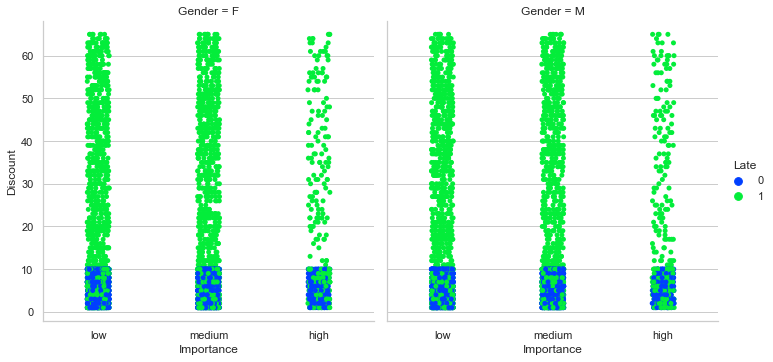

In [47]:
# Disocunt, Importance & Gender Categorical Plot Visualization with Target Hue
plt.figure(figsize=(12, 8))
sns.catplot(x='Importance', y='Discount', hue='Late', col='Gender', data=df)

<Figure size 864x576 with 0 Axes>

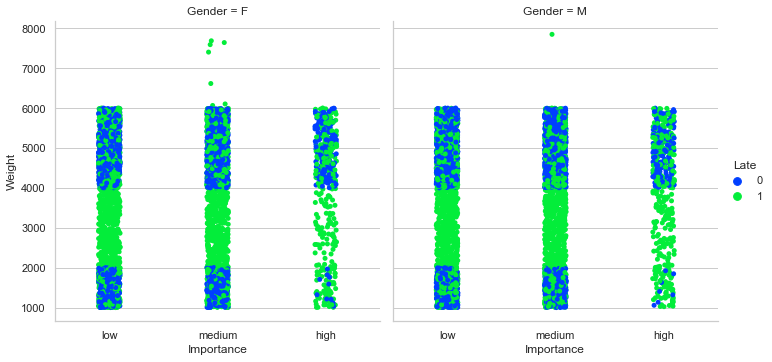

In [48]:
# Weight, Importance & Gender Categorical Plot Visualization with Target Hue
plt.figure(figsize=(12, 8))
sns.catplot(x='Importance', y='Weight', hue='Late', col='Gender', data=df)

<Figure size 864x576 with 0 Axes>

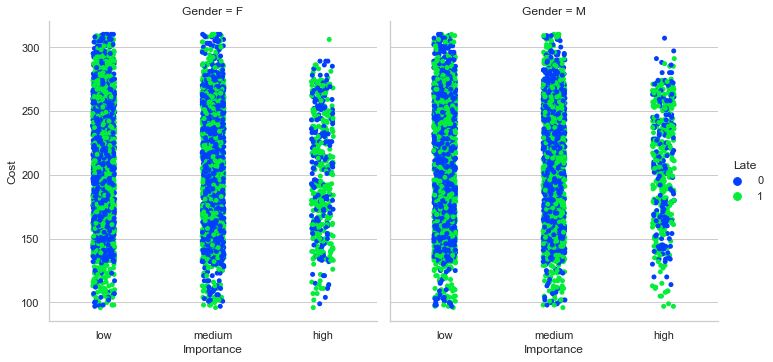

In [49]:
# Cost, Importance & Gender Categorical Plot Visualization with Target Hue
plt.figure(figsize=(12, 8))
sns.catplot(x='Importance', y='Cost', hue='Late', col='Gender', data=df)

In [50]:
# Discount Late Percentage with Target Hue
df_discount['Total'] = df_discount.groupby('Discount_Group')['SubTotal'].transform('sum')
df_discount['Percentage'] = round((df_discount['SubTotal'] / df_discount['Total']) * 100, 2)
df_discount

,Discount_Group,Late,SubTotal,Total,Percentage
0,1 - 10,0,4436,8352,53.11
1,1 - 10,1,3916,8352,46.89
2,11 - 20,1,496,496,100.00
3,21 - 30,1,441,441,100.00
4,> 30,1,1710,1710,100.00


In [51]:
# Weight Late Percentage with Target Hue
df_weight = df[['Weight','Late']]
Weight_Group = []

for index, kolom in df_weight.iterrows():
    if kolom['Weight']>=0 and kolom['Weight']<=2000:
        Weight_Group.append('0 sd 2000')
    elif kolom['Weight']>=2001 and kolom['Weight']<=4000:
        Weight_Group.append('2001 sd 4000')    
    else:
        Weight_Group.append('4001 sd 6000')

        
df_weight['Weight_Group'] = Weight_Group
df_weight = df_weight.groupby(['Weight_Group','Late'])['Weight'].count().reset_index()
df_weight.columns = ['Weight_Group', 'Late', 'SubTotal']
df_weight['Total'] = df_weight.groupby('Weight_Group')['SubTotal'].transform('sum')
df_weight['Percentage'] = round((df_weight['SubTotal'] / df_weight['Total']) * 100, 2)
df_weight

,Weight_Group,Late,SubTotal,Total,Percentage
0,0 sd 2000,0,1046,3245,32.23
1,0 sd 2000,1,2199,3245,67.77
2,2001 sd 4000,0,1,1788,0.06
3,2001 sd 4000,1,1787,1788,99.94
4,4001 sd 6000,0,3389,5966,56.81
5,4001 sd 6000,1,2577,5966,43.19


# Dataframe

4 Version of DataFrame for Modeling:
 - df = DataFrame with missing value & duplicate treatment, no outliers treatment
 - dfori = df DataFrame with feature encoding & normalization
 - df_project = df DataFrame with removed `Purchase` outliers and replaced `Discount` outliers with IQR Limit
 - dflimit = df DataFrame with all outliers replaced by IQR Limit

## df

In [52]:
df.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [53]:
# Check DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10999 non-null  int64 
 1   Warehouse   10999 non-null  object
 2   Shipment    10999 non-null  object
 3   Calls       10999 non-null  int64 
 4   Rating      10999 non-null  int64 
 5   Cost        10999 non-null  int64 
 6   Purchase    10999 non-null  int64 
 7   Importance  10999 non-null  object
 8   Gender      10999 non-null  object
 9   Discount    10999 non-null  int64 
 10  Weight      10999 non-null  int64 
 11  Late        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Missing Value

In [54]:
# Check Missing Value
df.isna().sum()

ID            0
Warehouse     0
Shipment      0
Calls         0
Rating        0
Cost          0
Purchase      0
Importance    0
Gender        0
Discount      0
Weight        0
Late          0
dtype: int64

### Duplicate Value

In [55]:
# Check Duplicate Value
df.duplicated().sum()

0

In [56]:
# Check Duplicate Value with Subset
df.duplicated(subset=['ID','Warehouse','Shipment']).sum()

0

In [57]:
# df Dataframe
df.head(5)

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## dfori

In [58]:
dfori = df.copy()

### Feature Encoding dfori

In [59]:
dfori.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [60]:
dfori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10999 non-null  int64 
 1   Warehouse   10999 non-null  object
 2   Shipment    10999 non-null  object
 3   Calls       10999 non-null  int64 
 4   Rating      10999 non-null  int64 
 5   Cost        10999 non-null  int64 
 6   Purchase    10999 non-null  int64 
 7   Importance  10999 non-null  object
 8   Gender      10999 non-null  object
 9   Discount    10999 non-null  int64 
 10  Weight      10999 non-null  int64 
 11  Late        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [61]:
#One Hot Encoding
FEwarehouse_ori = pd.get_dummies(dfori['Warehouse'], prefix = 'Warehouse')
FEshipment_ori = pd.get_dummies(dfori['Shipment'], prefix = 'Shipment')
FEGender_ori = pd.get_dummies(dfori['Gender'], prefix = 'Gender')

#Ordinal Encoding
Importance_ordinal_ori = pd.Categorical(dfori['Importance'], categories = ['low', 'medium', 'high'], ordered = True)
labels, unique = pd.factorize(Importance_ordinal_ori, sort = True)

#Concat Feature Encoding
dfori = pd.concat([dfori, FEwarehouse_ori], axis = 1)
dfori = pd.concat([dfori, FEshipment_ori], axis = 1)
dfori = pd.concat([dfori, FEGender_ori], axis = 1)
dfori['Importance'] = labels

In [62]:
#Drop Categorical Feature
dfori = dfori.drop(columns = ['ID', 'Warehouse', 'Shipment', 'Gender'])

### Feature Normalization dfori

In [63]:
# Features Normalization
ori_type = ['int64', 'uint8']
num_dfori = dfori.select_dtypes(include = ori_type)
nums_ori = num_dfori.columns
print(nums_ori)

Index(['Calls', 'Rating', 'Cost', 'Purchase', 'Importance', 'Discount',
       'Weight', 'Late', 'Warehouse_A', 'Warehouse_B', 'Warehouse_C',
       'Warehouse_D', 'Warehouse_F', 'Shipment_Flight', 'Shipment_Road',
       'Shipment_Ship', 'Gender_F', 'Gender_M'],
      dtype='object')


In [64]:
for i in range(len(nums_ori)):
    dfori[nums_ori[i]] = MinMaxScaler().fit_transform(dfori[nums_ori[i]].values.reshape(len(dfori), 1))

In [65]:
# Check DataFrame info
dfori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            10999 non-null  float64
 1   Rating           10999 non-null  float64
 2   Cost             10999 non-null  float64
 3   Purchase         10999 non-null  float64
 4   Importance       10999 non-null  float64
 5   Discount         10999 non-null  float64
 6   Weight           10999 non-null  float64
 7   Late             10999 non-null  float64
 8   Warehouse_A      10999 non-null  float64
 9   Warehouse_B      10999 non-null  float64
 10  Warehouse_C      10999 non-null  float64
 11  Warehouse_D      10999 non-null  float64
 12  Warehouse_F      10999 non-null  float64
 13  Shipment_Flight  10999 non-null  float64
 14  Shipment_Road    10999 non-null  float64
 15  Shipment_Ship    10999 non-null  float64
 16  Gender_F         10999 non-null  float64
 17  Gender_M    

In [66]:
# dfori DataFrame
dfori.head(10)

,Calls,Rating,Cost,Purchase,Importance,Discount,Weight,Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,0.4,0.25,0.378505,0.125,0.0,0.671875,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.4,1.00,0.560748,0.000,0.0,0.906250,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.25,0.406542,0.250,0.0,0.734375,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.2,0.50,0.373832,0.250,0.5,0.140625,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.25,0.411215,0.125,0.5,0.703125,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.2,0.00,0.308411,0.125,0.5,0.171875,0.060774,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.2,0.75,0.719626,0.125,0.0,0.031250,0.200146,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.4,0.00,0.640187,0.000,0.0,0.734375,0.263404,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8,0.2,0.75,0.252336,0.125,0.0,0.156250,0.125639,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.2,0.25,0.317757,0.125,0.5,0.437500,0.027173,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## df_project

In [67]:
df_project=df.copy()

### Remove Outliers

In [68]:
# Remove `Purchase` Outlier with IQR Limit
print(f'Rows before treatment: {len(df_project)}')

filtered_entries = np.array([True] * len(df_project))
for col in ['Purchase']:
    Q1 = df_project[col].quantile(0.25)
    Q3 = df_project[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_project[col] >= low_limit) & (df_project[col] <= high_limit)) & filtered_entries
    
df_project = df_project[filtered_entries]

print(f'Rows after treatment: {len(df_project)}')

Rows before treatment: 10999
Rows after treatment: 9996


<AxesSubplot:xlabel='Discount', ylabel='Density'>

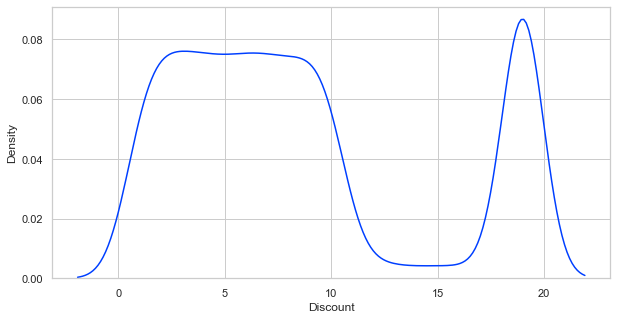

In [69]:
# Replace `Discount` Outlier with IQR Limit
Q1_discount = df_project['Discount'].quantile(0.25)
Q3_discount = df_project['Discount'].quantile(0.75)
IQR_discount = Q3_discount - Q1_discount
low_limit_discount = Q1_discount - (IQR_discount * 1.5)
high_limit_discount = Q3_discount + (IQR_discount * 1.5)
df_project['Discount'].loc[df_project['Discount'] > high_limit_discount] = high_limit_discount

# After Outliers Treatment Visualization
sns.kdeplot(x='Discount',data=df_project)

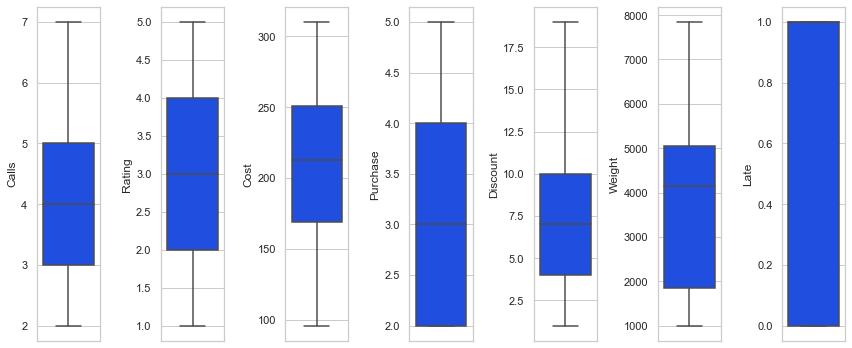

In [70]:
# After Outliers Treatment Visualization
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_project[nums[i]], orient='v')
    plt.tight_layout()

### Feature Encoding df_project

In [71]:
#One Hot Encoding
FEwarehouse_project = pd.get_dummies(df_project['Warehouse'], prefix = 'Warehouse')
FEshipment_project = pd.get_dummies(df_project['Shipment'], prefix = 'Shipment')
FEGender_project = pd.get_dummies(df_project['Gender'], prefix = 'Gender')

#Ordinal Encoding
Importance_ordinal_project = pd.Categorical(df_project['Importance'], categories = ['low', 'medium', 'high'], ordered = True)
labels, unique = pd.factorize(Importance_ordinal_project, sort = True)

#Concat Feature Encoding
df_project = pd.concat([df_project, FEwarehouse_project], axis = 1)
df_project = pd.concat([df_project, FEshipment_project], axis = 1)
df_project = pd.concat([df_project, FEGender_project], axis = 1)
df_project['Importance'] = labels

In [72]:
#Drop Categorical Feature
df_project = df_project.drop(columns = ['ID', 'Warehouse', 'Shipment', 'Gender'])

### Feature Normalization df_project

In [73]:
project_type = ['int64', 'uint8']
num_df_project = df_project.select_dtypes(include = project_type)
nums_project = num_df_project.columns
print(nums_project)

Index(['Calls', 'Rating', 'Cost', 'Purchase', 'Importance', 'Weight', 'Late',
       'Warehouse_A', 'Warehouse_B', 'Warehouse_C', 'Warehouse_D',
       'Warehouse_F', 'Shipment_Flight', 'Shipment_Road', 'Shipment_Ship',
       'Gender_F', 'Gender_M'],
      dtype='object')


In [74]:
# Normalization Features
for i in range(len(nums_project)):
    df_project[nums_project[i]] = MinMaxScaler().fit_transform(df_project[nums_project[i]].values.reshape(len(df_project), 1))

In [75]:
# Check df_project DataFrame info
df_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            9996 non-null   float64
 1   Rating           9996 non-null   float64
 2   Cost             9996 non-null   float64
 3   Purchase         9996 non-null   float64
 4   Importance       9996 non-null   float64
 5   Discount         9996 non-null   float64
 6   Weight           9996 non-null   float64
 7   Late             9996 non-null   float64
 8   Warehouse_A      9996 non-null   float64
 9   Warehouse_B      9996 non-null   float64
 10  Warehouse_C      9996 non-null   float64
 11  Warehouse_D      9996 non-null   float64
 12  Warehouse_F      9996 non-null   float64
 13  Shipment_Flight  9996 non-null   float64
 14  Shipment_Road    9996 non-null   float64
 15  Shipment_Ship    9996 non-null   float64
 16  Gender_F         9996 non-null   float64
 17  Gender_M     

In [76]:
# df_project DataFrame
df_project.head(10)

,Calls,Rating,Cost,Purchase,Importance,Discount,Weight,Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,0.4,0.25,0.378505,0.333333,0.0,19.0,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.4,1.00,0.560748,0.000000,0.0,19.0,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.25,0.406542,0.666667,0.0,19.0,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.2,0.50,0.373832,0.666667,0.5,10.0,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.25,0.411215,0.333333,0.5,19.0,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.2,0.00,0.308411,0.333333,0.5,12.0,0.060774,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.2,0.75,0.719626,0.333333,0.0,3.0,0.200146,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.4,0.00,0.640187,0.000000,0.0,19.0,0.263404,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8,0.2,0.75,0.252336,0.333333,0.0,11.0,0.125639,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.2,0.25,0.317757,0.333333,0.5,19.0,0.027173,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## dflimit

In [77]:
dflimit = df.copy()

### Replace Outliers with Limit IQR

In [78]:
# Replace Outlier with IQR Limit
print('Rows before treatment', len(dflimit))

for col in ['Purchase', 'Discount']:
    Q1 = dflimit[col].quantile(0.25)
    Q3 = dflimit[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    
    dflimit[col] = np.where(dflimit[col] > high_limit, high_limit, dflimit[col])
    dflimit[col] = np.where(dflimit[col] < low_limit, low_limit, dflimit[col])

print('Rows after treatment', len(dflimit))

Rows before treatment 10999
Rows after treatment 10999


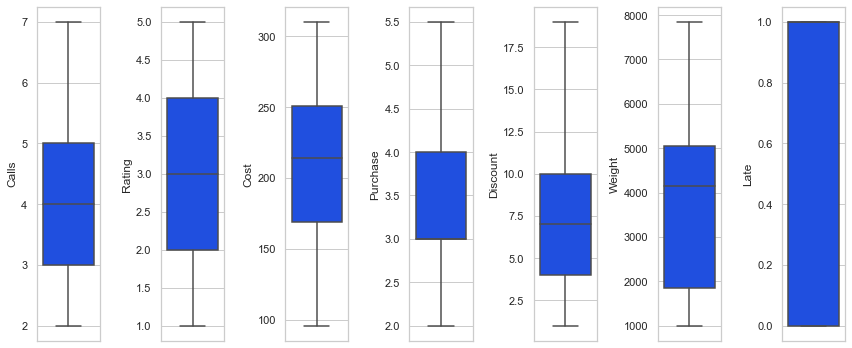

In [79]:
# After Outliers Treatment Visualization
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=dflimit[nums[i]], orient='v')
    plt.tight_layout()

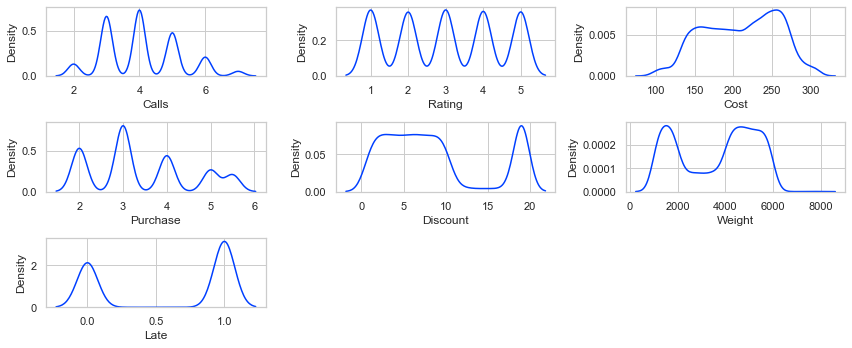

In [80]:
# After Outliers Treatment Visualization
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.kdeplot(x = dflimit[nums[i]])
    plt.tight_layout()

### Feature Encoding dflimit

In [81]:
#One Hot Encoding
FEwarehouse_limit = pd.get_dummies(dflimit['Warehouse'], prefix = 'Warehouse')
FEshipment_limit = pd.get_dummies(dflimit['Shipment'], prefix = 'Shipment')
FEGender_limit = pd.get_dummies(dflimit['Gender'], prefix = 'Gender')

#Ordinal Encoding
Importance_ordinal_limit = pd.Categorical(dflimit['Importance'], categories = ['low', 'medium', 'high'], ordered = True)
labels, unique = pd.factorize(Importance_ordinal_limit, sort = True)

#Concat Feature Encoding
dflimit = pd.concat([dflimit, FEwarehouse_limit], axis = 1)
dflimit = pd.concat([dflimit, FEshipment_limit], axis = 1)
dflimit = pd.concat([dflimit, FEGender_limit], axis = 1)
dflimit['Importance'] = labels

In [82]:
dflimit

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,...,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,1,D,Flight,4,2,177,3.0,0,F,19.0,...,0,0,0,1,0,1,0,0,1,0
1,2,F,Flight,4,5,216,2.0,0,M,19.0,...,0,0,0,0,1,1,0,0,0,1
2,3,A,Flight,2,2,183,4.0,0,M,19.0,...,1,0,0,0,0,1,0,0,0,1
3,4,B,Flight,3,3,176,4.0,1,M,10.0,...,0,1,0,0,0,1,0,0,0,1
4,5,C,Flight,2,2,184,3.0,1,F,19.0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5.0,1,F,1.0,...,1,0,0,0,0,0,0,1,1,0
10995,10996,B,Ship,4,1,232,5.0,1,F,6.0,...,0,1,0,0,0,0,0,1,1,0
10996,10997,C,Ship,5,4,242,5.0,0,F,4.0,...,0,0,1,0,0,0,0,1,1,0
10997,10998,F,Ship,5,2,223,5.5,1,M,2.0,...,0,0,0,0,1,0,0,1,0,1


In [83]:
#Drop Categorical Feature
dflimit = dflimit.drop(columns = ['ID', 'Warehouse', 'Shipment', 'Gender'])

### Feature Normalization dflimit

In [84]:
limit_type = ['int64', 'uint8', 'float64']
num_dflimit = dflimit.select_dtypes(include = limit_type)
nums_limit = num_dflimit.columns
print(nums_limit)

Index(['Calls', 'Rating', 'Cost', 'Purchase', 'Importance', 'Discount',
       'Weight', 'Late', 'Warehouse_A', 'Warehouse_B', 'Warehouse_C',
       'Warehouse_D', 'Warehouse_F', 'Shipment_Flight', 'Shipment_Road',
       'Shipment_Ship', 'Gender_F', 'Gender_M'],
      dtype='object')


In [85]:
# Normalization Features
for i in range(len(nums_limit)):
    dflimit[nums_limit[i]] = MinMaxScaler().fit_transform(dflimit[nums_limit[i]].values.reshape(len(dflimit), 1))

In [86]:
# Check dflimit info
dflimit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            10999 non-null  float64
 1   Rating           10999 non-null  float64
 2   Cost             10999 non-null  float64
 3   Purchase         10999 non-null  float64
 4   Importance       10999 non-null  float64
 5   Discount         10999 non-null  float64
 6   Weight           10999 non-null  float64
 7   Late             10999 non-null  float64
 8   Warehouse_A      10999 non-null  float64
 9   Warehouse_B      10999 non-null  float64
 10  Warehouse_C      10999 non-null  float64
 11  Warehouse_D      10999 non-null  float64
 12  Warehouse_F      10999 non-null  float64
 13  Shipment_Flight  10999 non-null  float64
 14  Shipment_Road    10999 non-null  float64
 15  Shipment_Ship    10999 non-null  float64
 16  Gender_F         10999 non-null  float64
 17  Gender_M    

In [87]:
# dflimit DataFrame
dflimit

,Calls,Rating,Cost,Purchase,Importance,Discount,Weight,Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,0.4,0.25,0.378505,0.285714,0.0,1.000000,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.4,1.00,0.560748,0.000000,0.0,1.000000,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.25,0.406542,0.571429,0.0,1.000000,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.2,0.50,0.373832,0.571429,0.5,0.500000,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.25,0.411215,0.285714,0.5,1.000000,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,0.4,0.00,0.728972,0.857143,0.5,0.000000,0.078451,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
10995,0.4,0.00,0.635514,0.857143,0.5,0.277778,0.035939,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
10996,0.6,0.75,0.682243,0.857143,0.0,0.166667,0.022498,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
10997,0.6,0.25,0.593458,1.000000,0.5,0.055556,0.030533,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


# Modeling

In [88]:
# Model Evaluation function
def model_evaluation(model, pred, xtrain, ytrain, xtest, ytest):
    print('Accuracy : %.3f' % accuracy_score(ytest, pred))
    print('Precision : %.3f' % precision_score(ytest, pred))
    print('Recall : %.3f' % recall_score(ytest, pred))
    print('F-1Score : %.3f' % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
    print('ROC AUC : %.3f' % auc(fpr, tpr))
    
    # Average precision score
    average_precision = average_precision_score(ytest, pred)
    print('AP : %.3f'% average_precision)

In [89]:
# Feature Importance Function
def feature_importance(model, x):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x.columns)
    ax = feat_importances.nlargest(25).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()

# Best Hyperparameter Function
def best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

## Model Logistic Regression (Best Model) <br> dataset : df_project

In [90]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            9996 non-null   float64
 1   Rating           9996 non-null   float64
 2   Cost             9996 non-null   float64
 3   Purchase         9996 non-null   float64
 4   Importance       9996 non-null   float64
 5   Discount         9996 non-null   float64
 6   Weight           9996 non-null   float64
 7   Late             9996 non-null   float64
 8   Warehouse_A      9996 non-null   float64
 9   Warehouse_B      9996 non-null   float64
 10  Warehouse_C      9996 non-null   float64
 11  Warehouse_D      9996 non-null   float64
 12  Warehouse_F      9996 non-null   float64
 13  Shipment_Flight  9996 non-null   float64
 14  Shipment_Road    9996 non-null   float64
 15  Shipment_Ship    9996 non-null   float64
 16  Gender_F         9996 non-null   float64
 17  Gender_M     

In [91]:
# Splitting Features & Target
xlr4 = df_project.drop(columns = ['Late']) # Features
ylr4 = df_project['Late'] # Target

In [92]:
# Splitting Data Train & Data Test
xlrtrain4, xlrtest4, ylrtrain4, ylrtest4 = train_test_split(xlr4, ylr4, test_size = 0.3, random_state = 33)

In [93]:
# Modeling
modelLR4 = LogisticRegression(random_state=33)
modelLR4.fit(xlrtrain4, ylrtrain4)

LogisticRegression(random_state=33)

In [94]:
# Model Prediction
y_pred_trainLR4 = modelLR4.predict(xlrtrain4)
y_pred_trainLR4

array([0., 1., 1., ..., 0., 1., 1.])

In [95]:
y_predLR4 = modelLR4.predict(xlrtest4)
y_predLR4

array([0., 1., 1., ..., 1., 0., 1.])

In [96]:
# Model Prediction Probability
modelLR4.predict_proba(xlrtest4)

array([[0.75188109, 0.24811891],
       [0.05329752, 0.94670248],
       [0.37335724, 0.62664276],
       ...,
       [0.06020781, 0.93979219],
       [0.64656902, 0.35343098],
       [0.40572873, 0.59427127]])

In [102]:
# Model Evaluation
model_evaluation(modelLR4, y_predLR4, xlrtrain4, ylrtrain4, xlrtest4, ylrtest4)

Accuracy : 0.644
Precision : 0.700
Recall : 0.719
F-1Score : 0.710
ROC AUC : 0.623
AP : 0.674


In [103]:
# Model Validation Average Precision
print('AP test score : ',average_precision_score(ylrtest4, y_predLR4))
print('AP train score : ',average_precision_score(ylrtrain4, y_pred_trainLR4))

AP test score :  0.6736635875708062
AP train score :  0.6671226322752545


In [104]:
# Model Validation Accuracy
print('train Accuracy : ',modelLR4.score(xlrtrain4, ylrtrain4))
print('test Accuracy : ',modelLR4.score(xlrtest4, ylrtest4))

train Accuracy :  0.6417035872516793
test Accuracy :  0.6435478492830944


<AxesSubplot:>

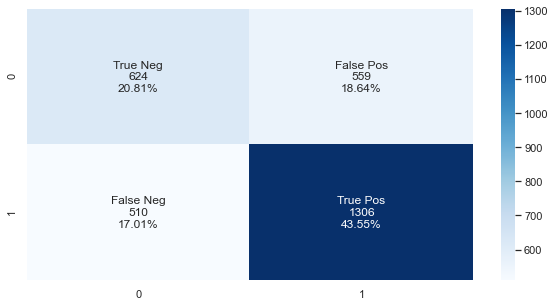

In [105]:
# Confusion Matrix
cf_matrixa = confusion_matrix(ylrtest4, y_predLR4)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

AP : 0.674


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.67')

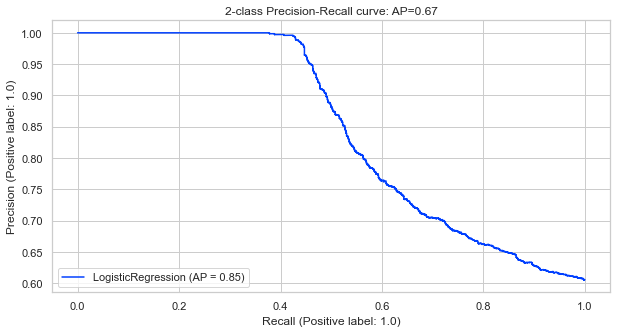

In [106]:
# Average Precision Plot
average_precision = average_precision_score(ylrtest4, y_predLR4)
print('AP : %.3f'% average_precision)

disp = plot_precision_recall_curve(modelLR4, xlrtest4, ylrtest4)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [107]:
# Logistic Regression Intercept
print(modelLR4.intercept_)

[0.88122623]


In [108]:
# Logistic Regression Coefficient
print(modelLR4.coef_)

[[-0.66323503  0.09827213 -0.28328805 -0.83536644  0.14087402  0.14449954
  -2.31417613 -0.06565017  0.0268434   0.03640049  0.0594915  -0.0299559
   0.01796904 -0.02491231  0.0340726  -0.02836403  0.05549335]]


In [109]:
# Logistic Regression Coefficient Table
koef2={'Feature':['Calls', 'Rating', 'Cost', 'Purchase', 'Importance', 'Discount',
       'Weight','Warehouse_A', 'Warehouse_B', 'Warehouse_C',
       'Warehouse_D', 'Warehouse_F', 'Shipment_Flight', 'Shipment_Road',
       'Shipment_Ship', 'Gender_F', 'Gender_M'],
     'Coefficient':[-0.71546752,0.09661052,-0.31429438,-2.20297555 ,0.1440757,8.03198014,
  -2.40729906,-0.0680354,0.02322063 ,0.03060397,0.05114368,-0.0352052,
   0.01004352,-0.03501893,0.02670308,-0.04108585,0.04281352] }
koef_table=pd.DataFrame.from_dict(koef2).sort_values(by=['Coefficient'],ascending=False).reset_index(drop=True)
koef_table

,Feature,Coefficient
0,Discount,8.031980
1,Importance,0.144076
2,Rating,0.096611
3,Warehouse_D,0.051144
4,Gender_M,0.042814
5,Warehouse_C,0.030604
6,Shipment_Ship,0.026703
7,Warehouse_B,0.023221
8,Shipment_Flight,0.010044
9,Shipment_Road,-0.035019


## Model XGBoost <br> dataset : dflimit

In [110]:
# Splitting Features & Target
xl4 = dflimit.drop(columns = ['Late'])
yl4 = dflimit['Late']

In [111]:
# Splitting data Train & data Test
xltrain4, xltest4, yltrain4, yltest4 = train_test_split(xl4, yl4, test_size = 0.3, random_state = 3)

In [112]:
# Evaluation Metrics
XGl4 = XGBClassifier(random_state = 3)
XGl4.fit(xltrain4, yltrain4)
predictionl4 = XGl4.predict(xltest4)
model_evaluation(XGl4, predictionl4, xltrain4, yltrain4, xltest4, yltest4)

[19:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.664
Precision : 0.729
Recall : 0.681
F-1Score : 0.705
ROC AUC : 0.660
AP : 0.684


In [113]:
# Model Prediction
predictionl4_train = XGl4.predict(xltrain4)
predictionl4_train

array([0., 1., 1., ..., 1., 1., 1.])

In [114]:
# Model Validation Average Precision
print('AP train: ',average_precision_score(yltrain4, predictionl4_train))
print('AP test: ',average_precision_score(yltest4, predictionl4))

AP train:  0.9305343344382166
AP test:  0.6841662966257959


In [115]:
# Model Validation Accuracy
print('train Accuracy : ',XGl4.score(xltrain4, yltrain4))
print('test Accuracy : ',XGl4.score(xltest4, yltest4))

train Accuracy :  0.9238862189894792
test Accuracy :  0.6639393939393939


## Model AdaBoost <br> dataset : dflimit

In [116]:
# Splitting Features & Target
xl5 = dflimit.drop(columns = ['Late'])
yl5 = dflimit['Late']

In [117]:
# Splitting Data Train & Data Test
xltrain5, xltest5, yltrain5, yltest5 = train_test_split(xl5, yl5, test_size = 0.3, random_state = 3)

In [118]:
# Evaluation Metrics
ABl5 = AdaBoostClassifier(random_state = 3)
ABl5.fit(xltrain5, yltrain5)
predictionl5 = ABl5.predict(xltest5)
model_evaluation(ABl5, predictionl5, xltrain5, yltrain5, xltest5, yltest5)

Accuracy : 0.667
Precision : 0.783
Recall : 0.601
F-1Score : 0.680
ROC AUC : 0.682
AP : 0.705


In [119]:
# Model Prediction
predictionl5_train = ABl5.predict(xltrain5)
predictionl5_train

array([0., 0., 0., ..., 0., 1., 0.])

In [120]:
# Model Validation Average Precision
print('AP train: ',average_precision_score(yltrain5, predictionl5_train))
print('AP test: ',average_precision_score(yltest5, predictionl5))

AP train:  0.7291951734218447
AP test:  0.7050101215849885


In [121]:
# Model Validation Accuracy
print('train Accuracy : ',ABl5.score(xltrain5, yltrain5))
print('test Accuracy : ',ABl5.score(xltest5, yltest5))

train Accuracy :  0.6848941420963761
test Accuracy :  0.6672727272727272


## Model Random Forest <br> dataset : dfori

In [122]:
dfori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            10999 non-null  float64
 1   Rating           10999 non-null  float64
 2   Cost             10999 non-null  float64
 3   Purchase         10999 non-null  float64
 4   Importance       10999 non-null  float64
 5   Discount         10999 non-null  float64
 6   Weight           10999 non-null  float64
 7   Late             10999 non-null  float64
 8   Warehouse_A      10999 non-null  float64
 9   Warehouse_B      10999 non-null  float64
 10  Warehouse_C      10999 non-null  float64
 11  Warehouse_D      10999 non-null  float64
 12  Warehouse_F      10999 non-null  float64
 13  Shipment_Flight  10999 non-null  float64
 14  Shipment_Road    10999 non-null  float64
 15  Shipment_Ship    10999 non-null  float64
 16  Gender_F         10999 non-null  float64
 17  Gender_M    

In [123]:
# Splitting Features & Target
xr1 = dfori.drop(columns = ['Late'])
yr1 = dfori['Late']

In [124]:
# Splitting Data Train & Data Test
xrtrain1, xrtest1, yrtrain1, yrtest1 = train_test_split(xr1, yr1, test_size = 0.3, random_state = 10)

In [125]:
# Evaluation Metrics
RFr1 = RandomForestClassifier(random_state = 10)
RFr1.fit(xrtrain1, yrtrain1)
predictionr1 = RFr1.predict(xrtest1)
model_evaluation(RFr1, predictionr1, xrtrain1, yrtrain1, xrtest1, yrtest1)

Accuracy : 0.661
Precision : 0.756
Recall : 0.642
F-1Score : 0.694
ROC AUC : 0.666
AP : 0.700


In [126]:
# Model Validation Accuracy
print('train Accuracy : ', RFr1.score(xrtrain1, yrtrain1))
print('test Accuracy : ', RFr1.score(xrtest1, yrtest1))

train Accuracy :  1.0
test Accuracy :  0.6609090909090909


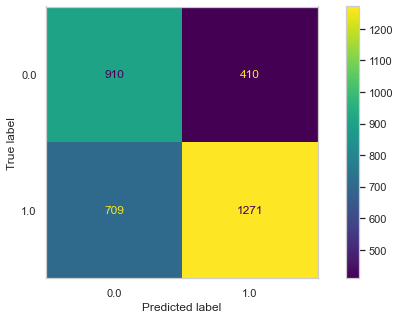

In [127]:
# Confusion Matrix
plot_confusion_matrix(RFr1, xrtest1, yrtest1)
plt.grid(False)
plt.show() 

### Tuning Hyperparameter Random Forest

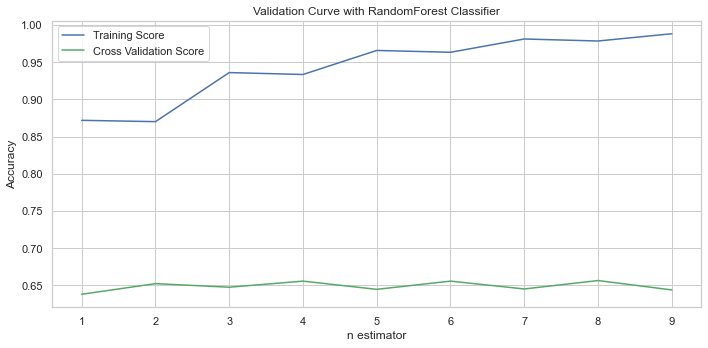

In [128]:
parameter_range = np.arange(1, 10, 1)

train_score, test_score = validation_curve(
                                RandomForestClassifier(random_state = 10),
                                X = xrtrain1, y = yrtrain1, 
                                param_name = 'n_estimators', 
                                param_range = parameter_range,
                                cv = 5,
                                scoring = 'accuracy')

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RandomForest Classifier")
plt.xlabel("n estimator")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [129]:
# Evaluation Metrics
RFHr1 = RandomForestClassifier(random_state = 10, n_estimators = 8, max_depth = 4, min_samples_split = 5, min_samples_leaf = 2)
RFHr1.fit(xrtrain1, yrtrain1)
predictionr1 = RFHr1.predict(xrtest1)
model_evaluation(RFHr1, predictionr1, xrtrain1, yrtrain1, xrtest1, yrtest1)

Accuracy : 0.679
Precision : 0.844
Recall : 0.570
F-1Score : 0.681
ROC AUC : 0.706
AP : 0.739


In [130]:
# Model Prediction
predictionr1_train = RFHr1.predict(xrtrain1)
predictionr1_train

array([1., 0., 0., ..., 1., 0., 1.])

In [131]:
# Model Validation Average Precision
print('AP train: ',average_precision_score(yrtrain1, predictionr1_train))
print('AP train: ',average_precision_score(yrtest1, predictionr1))

AP train:  0.7414611484184332
AP train:  0.7390133774214491


In [132]:
# Model Validation Accuracy
print('train Accuracy : ', RFHr1.score(xrtrain1, yrtrain1))
print('test Accuracy : ', RFHr1.score(xrtest1, yrtest1))

train Accuracy :  0.6889206390440317
test Accuracy :  0.6787878787878788


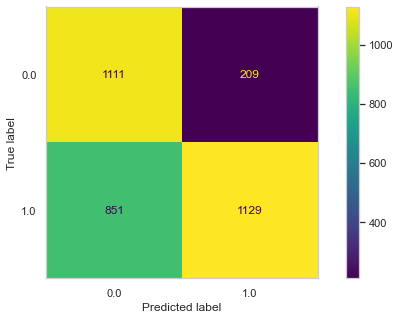

In [133]:
# Model Validation Average Precision
plot_confusion_matrix(RFHr1, xrtest1, yrtest1)
plt.grid(False)
plt.show() 

# Benefit Analysis

In [134]:
#On Time Rate Growth Calculation 
Total = df['ID'].count()
Late =  df[df['Late']==1]['ID'].count()
OnTime =  df[df['Late']==0]['ID'].count()
PredRate = 0.73
PredLate = round(Late*PredRate)
PredOnTime = Late-PredLate

print('----- Existing -----')
print('\t\t\t','count', 'percentage')
print('Delivery : \t\t', Total)
print('Late : \t\t\t', Late, ',', round(Late/Total*100,1),'%')
print('On Time : \t\t', OnTime, ',', round(OnTime/Total*100,1),'%')
print()
print('----- After Modeling -----')
print('\t\t\t','count', 'percentage')
print('Delivery : \t\t', Total)
print('Late : \t\t\t', Late, ',', round(Late/Total*100,1),'%')
print('  Predicted Late : \t', round(PredLate), ',', round(PredLate/Late*100,1),'%')
print('  Predicted On Time : \t', round(PredOnTime), ',', round(PredOnTime/Late*100,1),'%')
print('Late After Pred : \t', Late-PredLate, ',', round((Late-PredLate)/Total*100,1),'%')
print('On Time : \t\t', OnTime, ',', round(OnTime/Total*100,1),'%')
print('On Time After Pred : \t', OnTime+PredLate, ',', round((OnTime+PredLate)/Total*100,1),'%')
print('On Time Growth rate : \t', round(((OnTime+PredLate)/(OnTime)-1)*100,1), '%')

----- Existing -----
			 count percentage
Delivery : 		 10999
Late : 			 6563 , 59.7 %
On Time : 		 4436 , 40.3 %

----- After Modeling -----
			 count percentage
Delivery : 		 10999
Late : 			 6563 , 59.7 %
  Predicted Late : 	 4791 , 73.0 %
  Predicted On Time : 	 1772 , 27.0 %
Late After Pred : 	 1772 , 16.1 %
On Time : 		 4436 , 40.3 %
On Time After Pred : 	 9227 , 83.9 %
On Time Growth rate : 	 108.0 %


On time rate potentially increase by 108% from the previous 40.3% to become 83.9% after action based on predictive modeling

In [135]:
#Potential Revenue Loss Saved Calculation
TotalCost = df['Cost'].sum()
TotalDiscount = df['Discount'].sum()
TotalRevenue = TotalCost - TotalDiscount
AvgRevenue = round(TotalRevenue / Total, 2)

print('Total Cost : \t\t', '{:,}'.format(TotalCost))
print('Total Discount : \t', '{:,}'.format(TotalDiscount))
print('Total Revenue : \t', '{:,}'.format(TotalRevenue))
print('Average Revenue : \t', '{:,}'.format(AvgRevenue))
print()
print('Potential Revenue')
print('Late : \t\t\t', '{:,.2f}'.format(AvgRevenue * Late))
print('Predicted Late : \t', '{:,.2f}'.format(AvgRevenue * PredLate))
print()
print('*Nominal in Dollar $')

Total Cost : 		 2,311,955
Total Discount : 	 147,092
Total Revenue : 	 2,164,863
Average Revenue : 	 196.82

Potential Revenue
Late : 			 1,291,729.66
Predicted Late : 	 942,964.62

*Nominal in Dollar $


Possibility of revenue loss potentially saved by $942,964.62 after action based on predictive modeling

In [136]:
# Filtering customers late & give 5 rating
df[(df['Late']==1) & (df['Rating']==5)]

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
11,12,F,Flight,4,5,232,3,medium,F,32,3253,1
12,13,D,Flight,3,5,198,3,medium,F,1,3667,1
17,18,F,Ship,5,5,227,3,medium,M,36,3952,1
18,19,D,Ship,5,5,239,3,high,M,18,2495,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10900,10901,C,Ship,5,5,196,4,medium,M,8,4604,1
10903,10904,F,Ship,3,5,241,4,low,F,9,5526,1
10910,10911,A,Ship,5,5,264,8,high,F,10,5759,1
10963,10964,F,Flight,4,5,220,10,medium,M,8,4100,1


In [137]:
#20% from late customer give 5 rating
late5percent=(1317/6563)*100
late5percent

20.06704251104678

In [138]:
#Rating Growth Calculation 
TotalRating = df['Rating'].sum()
AvgRating = round(TotalRating / Total, 2)
print('Total Rating : \t\t\t', '{:,}'.format(TotalRating))
print('Average Rating : \t\t', AvgRating)
print()
print('Predicted Late Rating : \t', '{:,}'.format(TotalRating), '+' , '{:,}'.format(PredLate-round(PredLate*0.2)), '=', '{:,}'.format(TotalRating + PredLate-round(PredLate*0.2)) )
print('Predicted Late Estimated Rating goes up by 1 (except Rating = 5)')
print()
print('Avg Rating after Prediction : \t', round(((TotalRating + PredLate-round(PredLate*0.2))/Total), 2))
print('On Time Growth rate : \t\t', round((((TotalRating + PredLate-round(PredLate*0.2))/Total)/((TotalRating)/Total)-1)*100,1), '%')

Total Rating : 			 32,893
Average Rating : 		 2.99

Predicted Late Rating : 	 32,893 + 3,833 = 36,726
Predicted Late Estimated Rating goes up by 1 (except Rating = 5)

Avg Rating after Prediction : 	 3.34
On Time Growth rate : 		 11.7 %


Rating potentially increase by 11.7% from the previous average of 2.99 to become 3.34 